<a href="https://colab.research.google.com/github/chu-ise/411A-2022/blob/main/notebooks/03/01_fomc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Environment setup to persist data in Google Drive

In [1]:
import os, sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    from google.colab import drive
    if not os.path.exists('/content/drive'):
      drive.mount("/content/drive")
      !ln -s "/content/drive/My Drive/colab_workspace" workspace
    WORKSPACE_DIR = "/content/workspace"
else:
    WORKSPACE_DIR = "../../workspace" 
print(f'WORKSPACE_DIR = {WORKSPACE_DIR}')
data_dir = os.path.join(WORKSPACE_DIR, "data")
os.makedirs(data_dir, exist_ok=True)

Mounted at /content/drive
WORKSPACE_DIR = /content/workspace


In [3]:
import gdown, os
id = "149qKjPXsYUlKftKfsgZto7xVxRObYFPX"

data_file = "conf.zip"
conf_dir = data_file.split(".")[0]
if not os.path.exists(conf_dir):
    gdown.download(id=id, output=data_file, quiet=False)
    !unzip $data_file
    os.remove(data_file)
else:
    print(f"{conf_dir} already exists")

Downloading...
From: https://drive.google.com/uc?id=149qKjPXsYUlKftKfsgZto7xVxRObYFPX
To: /content/conf.zip
100%|██████████| 1.69k/1.69k [00:00<00:00, 1.43MB/s]

Archive:  conf.zip
   creating: conf/
  inflating: conf/config.yaml        
   creating: conf/downloader/
  inflating: conf/downloader/_default.yaml  
  inflating: conf/downloader/enwiki.yaml  
  inflating: conf/downloader/minutes.yaml  


In [4]:
%%capture
%pip install ekorpkit[dataset]==0.1.12.post0.dev6
%pip install ekorpkit[fomc]==0.1.12.post0.dev6

### Download FOMC Minutes and Build a Dataset

In [5]:
from ekorpkit.io.fetch.fomc import Minutes

In [6]:
import os
from hydra import initialize, compose

In [7]:
with initialize(config_path="conf"):
    cfg=compose(
        overrides=[
            "+downloader=minutes",
            f"+data_dir={data_dir}",
        ]
    )
    print(cfg)

{'downloader': {'name': 'beigebook', 'output_dir': '${..data_dir}/${.name}', 'output_file': None, 'autoload': False, 'force_download': False, 'num_workers': 1, 'compress': False, 'verbose': True, '_target_': 'ekorpkit.io.fetch.fomc.minutes', 'from_year': 2000, 'content_type': 'fomc_minutes', 'base_url': 'https://www.federalreserve.gov', 'calendar_url': '${.base_url}/monetarypolicy/fomccalendars.htm', 'segment_separator': '\\n\\n', 'chair': {'columns': ['Surname', 'FirstName', 'FromDate', 'ToDate'], 'data': [['Greenspan', 'Alan', '1987-08-11', '2006-01-31'], ['Bernanke', 'Ben', '2006-02-01', '2014-01-31'], ['Yellen', 'Janet', '2014-02-03', '2018-02-03'], ['Powell', 'Jerome', '2018-02-05', '2022-02-05']]}}, 'data_dir': '/content/workspace/data'}


In [8]:
fomc = Minutes(**cfg.downloader)

fomc_minutes


In [9]:
print(f"Downloading {fomc.content_type}")
df = fomc.get_contents(cfg.downloader.from_year)
print("Shape of the downloaded data: ", df.shape)
print("The first 5 rows of the data: \n", df.head())
print("The last 5 rows of the data: \n", df.tail())
fomc.save()

Getting links for minutes...
41 links found in the current page.
Getting links from archive pages...
YEAR: 2000 - 8 links found.
YEAR: 2001 - 13 links found.
YEAR: 2002 - 8 links found.
YEAR: 2003 - 8 links found.
YEAR: 2004 - 8 links found.
YEAR: 2005 - 8 links found.
YEAR: 2006 - 8 links found.
YEAR: 2007 - 10 links found.
YEAR: 2008 - 7 links found.
YEAR: 2009 - 8 links found.
YEAR: 2010 - 8 links found.
YEAR: 2011 - 8 links found.
YEAR: 2012 - 8 links found.
YEAR: 2013 - 8 links found.
YEAR: 2014 - 8 links found.
There are total  167  links for  fomc_minutes
Getting articles - Multi-threaded...
.......................................................................................................................................................................Shape of the downloaded data:  (167, 5)
The first 5 rows of the data: 
         date         speaker                 title  \
0 2000-02-02  Alan Greenspan  FOMC Meeting Minutes   
1 2000-03-21  Alan Greenspan  FOMC Meeting Minu

In [10]:
Minutes??

In [11]:
data_file =  cfg.downloader.output_dir + "/fomc_minutes.csv"
print(data_file)


/content/workspace/data/beigebook/fomc_minutes.csv


In [12]:
import pandas as pd
df = pd.read_csv(data_file)
df.head()

,date,speaker,title,text,content_type
0,2000-02-02,Alan Greenspan,FOMC Meeting Minutes,A meeting of the Federal Open Market Committee...,fomc_minutes
1,2000-03-21,Alan Greenspan,FOMC Meeting Minutes,A meeting of the Federal Open Market Committee...,fomc_minutes
2,2000-05-16,Alan Greenspan,FOMC Meeting Minutes,A meeting of the Federal Open Market Committee...,fomc_minutes
3,2000-06-28,Alan Greenspan,FOMC Meeting Minutes,A meeting of the Federal Open Market Committee...,fomc_minutes
4,2000-08-22,Alan Greenspan,FOMC Meeting Minutes,A meeting of the Federal Open Market Committee...,fomc_minutes


In [13]:
df.info() # check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          167 non-null    object
 1   speaker       167 non-null    object
 2   title         167 non-null    object
 3   text          167 non-null    object
 4   content_type  167 non-null    object
dtypes: object(5)
memory usage: 6.6+ KB


In [14]:
df['date'] = pd.to_datetime(df['date'])
df['date']

0     2000-02-02
1     2000-03-21
2     2000-05-16
3     2000-06-28
4     2000-08-22
         ...    
162   2021-07-28
163   2021-09-22
164   2021-11-03
165   2021-12-15
166   2022-01-26
Name: date, Length: 167, dtype: datetime64[ns]

In [15]:
df['year'] = df['date'].dt.year
df['year'].value_counts()

2001    12
2007    10
2000     9
2012     8
2021     8
2020     8
2019     8
2018     8
2017     8
2014     8
2013     8
2010     8
2011     8
2009     8
2006     8
2005     8
2004     8
2003     8
2002     8
2008     7
2022     1
Name: year, dtype: int64

## RegEx

Please refer to [RegExOne Regular Expressions Lessons](http://regexone.com) and [the python documentation](https://docs.python.org/3/howto/regex.html).

In [16]:
import re

docs = df[:5]['text']

# Extract words after Federal Reserve.
for doc in docs:    
    print(re.findall(r'Federal Reserve \w+ ', # pattern to match. always put 'r' in front of string so that backslashes are treated literally.
                     doc,            # string
                     re.IGNORECASE))  # ignore upper/lowercase (optional)

['Federal Reserve System ', 'Federal Reserve Banks ', 'Federal Reserve Banks ', 'Federal Reserve Bank ', 'Federal Reserve Bank ', 'Federal Reserve Bank ', 'Federal Reserve Bank ', 'Federal Reserve Bank ', 'Federal Reserve Bank ', 'Federal Reserve Bank ', 'Federal Reserve Bank ', 'Federal Reserve Bank ', 'Federal Reserve Bank ', 'Federal Reserve Bank ', 'Federal Reserve Bank ', 'Federal Reserve Bank ', 'Federal Reserve Bank ', 'Federal Reserve Bank ', 'Federal Reserve Bank ', 'Federal Reserve Bank ', 'Federal Reserve Bank ', 'Federal Reserve Bank ', 'Federal Reserve Bank ', 'Federal Reserve Bank ', 'Federal Reserve Bank ', 'Federal Reserve Bank ', 'Federal Reserve Bank ', 'Federal Reserve Bank ', 'Federal Reserve Bank ', 'Federal Reserve Bank ', 'Federal Reserve System ', 'Federal Reserve Bank ', 'Federal Reserve Bank ', 'Federal Reserve Banks ', 'Federal Reserve Banks ', 'Federal Reserve participation ', 'Federal Reserve Bank ', 'Federal Reserve Bank ', 'Federal Reserve districts ', 'F

In [17]:
# Extract hyphenated words
for doc in docs:    
    print(re.findall(r'[a-z]+-[a-z]+', 
                     doc,            
                     re.IGNORECASE))  

['century-data', 'short-term', 'long-run', 'non-market', 'short-term', 'year-end', 'long-term', 'year-end', 'two-month', 'first-half', 'high-tech', 'year-end', 'inventory-sales', 'October-November', 'third-quarter', 'century-date', 'year-end', 'century-date', 'trade-weighted', 'century-date', 'non-M', 'expenditures-encompassed', 'broad-based', 'high-tech', 'short-lived', 'high-tech', 'fixed-rate', 'long-term', 'lower-cost', 'near-term', 'longer-run', 'inflation-indexed', 'long-run', 'Humphrey-Hawkins', 'long-run', 'longer-run', 'long-term', 'long-run', 'long-run']
['tri-party', 'broad-gauge', 'longer-term', 'sale-purchase', 'tri-party', 'sale-purchase', 'high-tech', 'January-February', 'long-term', 'January-February', 'single-family', 'single-family', 'non-aircraft', 'inventory-sales', 'stock-shipments', 'inventory-sales', 'twelve-month', 'twelve-month', 'January-February', 'twelve-month', 'longer-term', 'trade-weighted', 'technology-related', 'year-end', 'first-quarter', 'high-tech', 

In [18]:
# baker-bloom economic uncertainty
pattern1 = r'(\b)uncertain[a-z]*'
pattern2 = r'(\b)econom[a-z]*'
pattern3 = r'(\b)congress(\b)|(\b)deficit(\b)|(\b)federal reserve(\b)|(\b)legislation(\b)|(\b)regulation(\b)|(\b)white house(\b)'

In [19]:
# extract uncertainty words
for pattern in [pattern1, pattern2, pattern3]:
    print(f'pattern = {pattern}')
    for i, doc in enumerate(docs):
        finder = re.finditer(pattern, doc, re.IGNORECASE)
        for m in finder: 
            print(i, m.span(),m.group()) # location (start,end) and matching string

pattern = (\b)uncertain[a-z]*
0 (38230, 38239) uncertain
0 (43306, 43317) uncertainty
0 (45013, 45026) uncertainties
0 (45654, 45667) uncertainties
0 (47489, 47500) uncertainty
0 (49014, 49027) uncertainties
1 (20002, 20013) uncertainty
1 (25941, 25954) uncertainties
3 (13841, 13852) uncertainty
3 (18093, 18102) uncertain
3 (22952, 22965) uncertainties
3 (24025, 24038) uncertainties
4 (16115, 16126) uncertainty
4 (23320, 23331) uncertainty
pattern = (\b)econom[a-z]*
0 (512, 521) Economist
0 (692, 701) Economist
0 (713, 722) Economist
0 (850, 860) Economists
0 (1485, 1495) Economists
0 (1649, 1659) Economists
0 (3773, 3782) Economist
0 (3992, 4001) Economist
0 (4019, 4028) Economist
0 (4232, 4242) Economists
0 (10644, 10652) economic
0 (10683, 10691) economic
0 (24451, 24459) economic
0 (24671, 24679) economic
0 (28964, 28972) economic
0 (29054, 29062) economic
0 (29171, 29179) Economic
0 (29312, 29320) Economic
0 (31787, 31795) economic
0 (33503, 33510) economy
0 (34047, 34055) economi

In [20]:
def indicates_uncertainty(doc):
    m1 = len(re.findall(pattern1, doc, re.IGNORECASE))
    m2 = len(re.findall(pattern2, doc, re.IGNORECASE))
    m3 = len(re.findall(pattern3, doc, re.IGNORECASE))
    return m1 + m2 + m3

In [21]:
df['uncertainty'] = df['text'].apply(indicates_uncertainty)

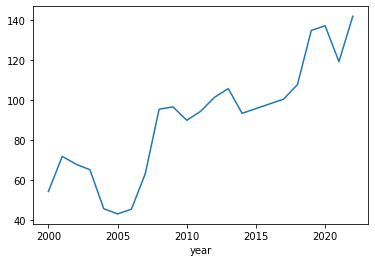

In [22]:
df.groupby('year')['uncertainty'].mean().plot()